In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../../../../../src/")
import nanonets_utils
import nanonets
from scipy.optimize import curve_fit
from scipy.special import gamma
plt.style.use(["science","bright","grid"])

def exp_func(x, a, b, c):
    return -a*np.exp(-b*x) + c
def exp_func2(x, a, b, c, d):
    return a*np.exp(b*(x-c)) + d

def saturation_cuve(t, tau, a0, t0):
    return a0*(1 - np.exp(-(t-t0) / tau))

def stretched_saturation_curve(t, tau, a0, beta):
    return a0*(1 - np.exp(-(t/tau)**beta))

def double_saturation_cuve(t, tau1, tau2, a0, b0, b1):
    return a0 - b0* np.exp(-t / tau1) - b1* np.exp(-t / tau2)

def lin_func(x, a, b, c):
    return a*(x-b)+c

## String Temperature Dependce

In [2]:
# folder  = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/"
folder      = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/T_dep/"
t_vals      = np.arange(9999)*1e-7*1e6
temp_vals   = [1.0,2.0,4.0,8.0,16.0,36.0,64.0,128.0,256.0,512.0]
N_vals      = [5,10,20]
N_p         = 10
data_string = {temp : {N_p : pd.read_csv(f"{folder}Nx={N_p}_Ny=1_Nz=1_Ne=2_T_{temp}.csv") for N_p in N_vals} for temp in temp_vals}

FileNotFoundError: [Errno 2] No such file or directory: '/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/T_dep/Nx=5_Ny=1_Nz=1_Ne=2_T_1.0.csv'

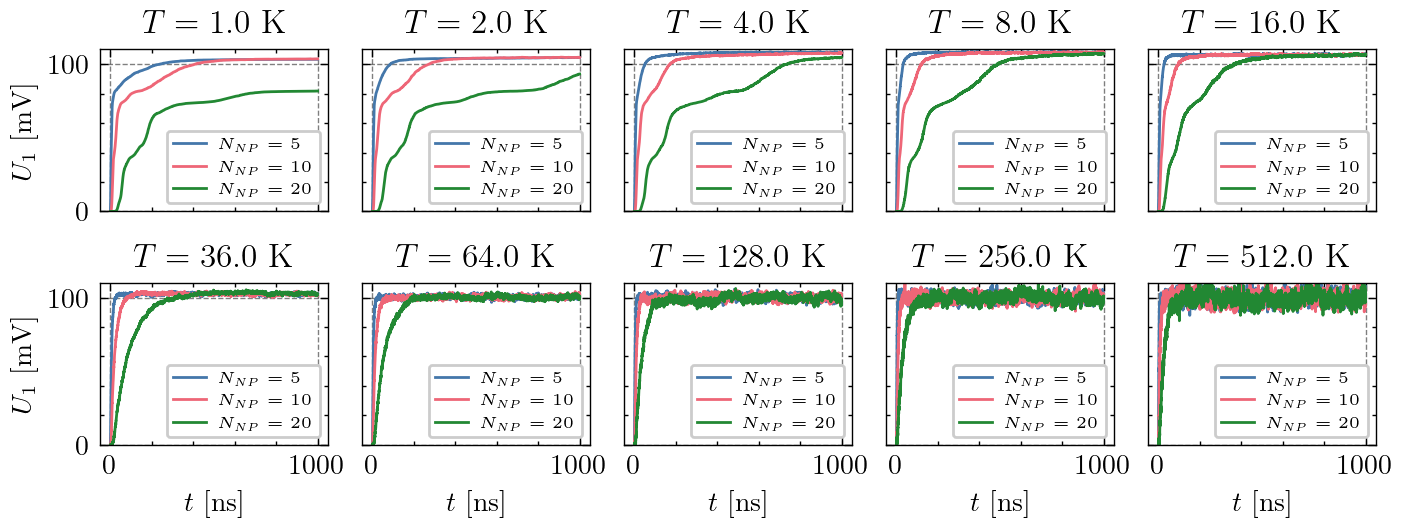

In [462]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)

for i,temp in enumerate(temp_vals):
    ax  = fig.add_subplot(2,5,i+1)
    for N_p in N_vals:
        y   = data_string[temp][N_p]['Current'].values*1000
        ax.plot(t_vals, y, label='$N_{NP} = '+f'{N_p}$')

    ax.set_title(f"$T = {temp}$ K")
    # ax.set_xlim(0,500)
    ax.set_ylim(0,110)

    if i >= 5:
        ax.set_xlabel("$t$ [ns]")
    else:
        ax.set_xticklabels("")
    if i % 5 == 0:
        ax.set_ylabel("$U_1$ [mV]")
    else:
        ax.set_yticklabels("")
    
    ax.legend(fontsize='xx-small')

In [463]:
taus    = []
tau_m   = []
stds    = []
params  = []
N_p     = 5

for i, temp, in enumerate(temp_vals):
    x_fit   = t_vals.copy()
    y_fit   = data_string[temp][N_p]['Current'].values*1000
    p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,100,1])
    # p, cov  = curve_fit(stretched_saturation_curve, x_fit, y_fit, p0=[10,100,1])

    params.append(p)
    taus.append(p[0])
    stds.append(np.sqrt(cov[0,0]))
    tau_m.append(p[0]/p[2] * gamma(1 / p[2]))

params

/tmp/ipykernel_19780/3017449972.py:19: RuntimeWarning: overflow encountered in exp
  return a0*(1 - np.exp(-(t-t0) / tau))
/tmp/ipykernel_19780/3017449972.py:19: RuntimeWarning: overflow encountered in multiply
  return a0*(1 - np.exp(-(t-t0) / tau))


[array([ 59.07564993, 102.49380932, -48.72005432]),
 array([ 19.23513429, 103.6491705 ,  -6.34362106]),
 array([ 16.45537388, 107.39300802,  -3.88841012]),
 array([ 11.68259205, 107.85269611,  -1.18106983]),
 array([  8.98833745, 106.27020037,  -0.2782101 ]),
 array([  5.85166144, 102.39628649,   0.251246  ]),
 array([  4.17294963, 100.39637024,   0.23651436]),
 array([  2.95719537, 100.0397793 ,   0.23838671]),
 array([ 2.41501618, 99.97905712,  0.23630975]),
 array([ 2.28302382, 99.85768096,  0.22125586])]

Text(0, 0.5, '$<\\tau>$ [ns]')

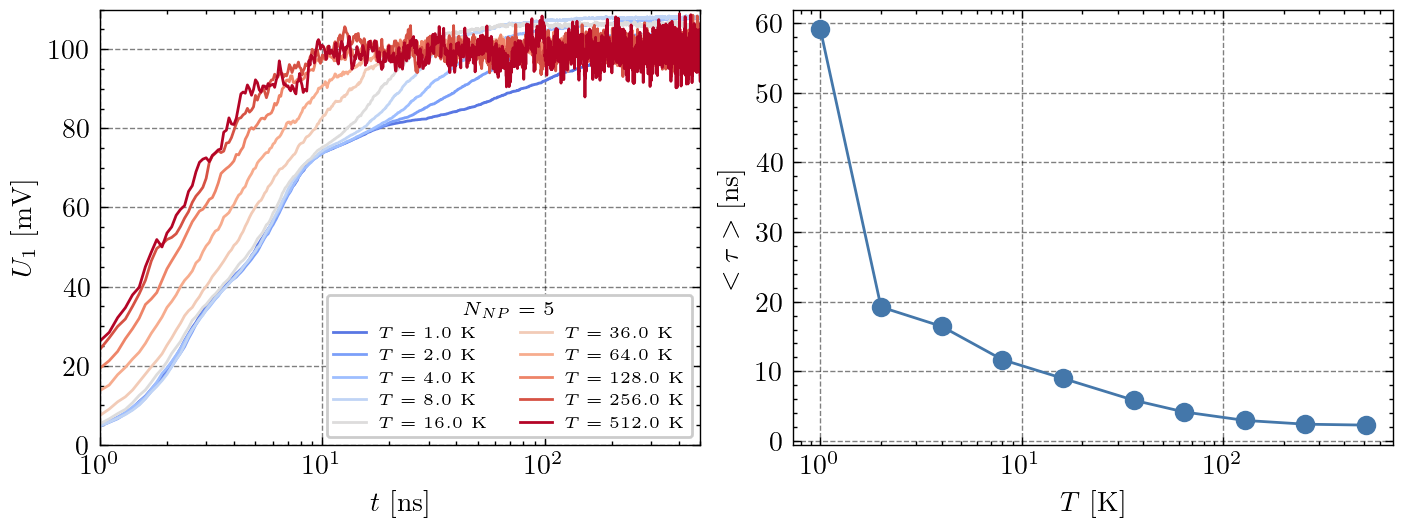

In [464]:
N_p = 5
cm  = plt.get_cmap('coolwarm')
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)

ax  = fig.add_subplot(1,2,1)
for i,temp in enumerate(temp_vals):

    y   = data_string[temp][N_p]['Current'].values*1000
    ax.plot(t_vals, y, label=f'$T = {temp}$ K', c=cm((i+1)/len(temp_vals)))

    ax.set_xlim(1,500)
    ax.set_ylim(0,110)
    ax.set_xscale('log')
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$U_1$ [mV]")
    
    ax.legend(fontsize='xx-small', ncol=2, loc='lower right', title="$N_{NP}"+f" = {N_p}$", title_fontsize='x-small')

ax  = fig.add_subplot(1,2,2)
# ax.plot(temp_vals, tau_m, '-o')
ax.plot(temp_vals, taus, '-o')
ax.set_xscale('log')
ax.set_xlabel("$T$ [K]")
ax.set_ylabel("$<\\tau>$ [ns]")

In [37]:
topology_parameter  = {
    "Nx"                : 10,
    "Ny"                : 1,
    "Nz"                : 1,
    "e_pos"             : [[0,0,0],[9,0,0]],
    "electrode_type"    : ['constant','floating']
}

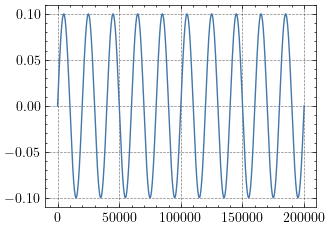

In [54]:
N_voltages          = 200000
f0                  = 0.5
frequencies         = [f0*1e6,0.0]
amplitudes          = [0.1,0.0]
time_step           = 1e-10
time_steps, volt    = nanonets_utils.sinusoidal_voltages(N_voltages, topology_parameter, amplitudes=amplitudes, frequencies=frequencies, time_step=time_step)
plt.plot(volt[:,0])

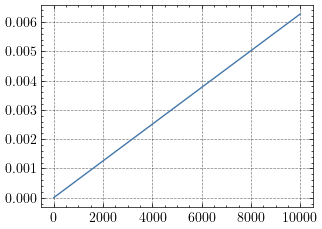

In [43]:
plt.plot(volt[:,0])

## @ 293K

In [31]:
folder  = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/highT/"
# folder      = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/highT/"
t_vals      = np.arange(39999)*1e-7*1e6
N_vals      = [2,4,6,8,10,12,14,16,18,20]
data_string = {N_p : pd.read_csv(f"{folder}Nx={N_p}_Ny=1_Nz=1_Ne=2.csv") for N_p in N_vals}

In [32]:
taus    = []
tau_m   = []
params  = []
covs    = []

for i, N in enumerate(N_vals):
    x_fit   = t_vals.copy()
    y_fit   = data_string[N]['Current'].values*1000
    # p, cov  = curve_fit(stretched_saturation_curve, x_fit, y_fit, p0=[10,100,1.0], bounds=[(0,0,0),(500,120,2)])
    p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,100,1.0], bounds=[(0,80,0),(500,120,20)])
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    tau_m.append(p[0]/p[2] * gamma(1 / p[2]))
    
params

[array([3.60208636e-01, 9.99983951e+01, 2.70140781e-14]),
 array([1.30473252e+00, 1.00080876e+02, 1.38410236e-02]),
 array([ 2.31365925, 99.89964599,  0.18774591]),
 array([ 4.24694063, 99.9524589 ,  0.42656966]),
 array([  5.82758871, 100.23118775,   1.00917875]),
 array([ 7.42061568, 99.90728945,  1.56537125]),
 array([ 14.41197854, 100.14512246,   1.23286686]),
 array([13.72309518, 99.75983272,  2.30518612]),
 array([ 18.2560149 , 100.21237258,   1.99005654]),
 array([25.19781029, 99.76907112,  3.68441668])]

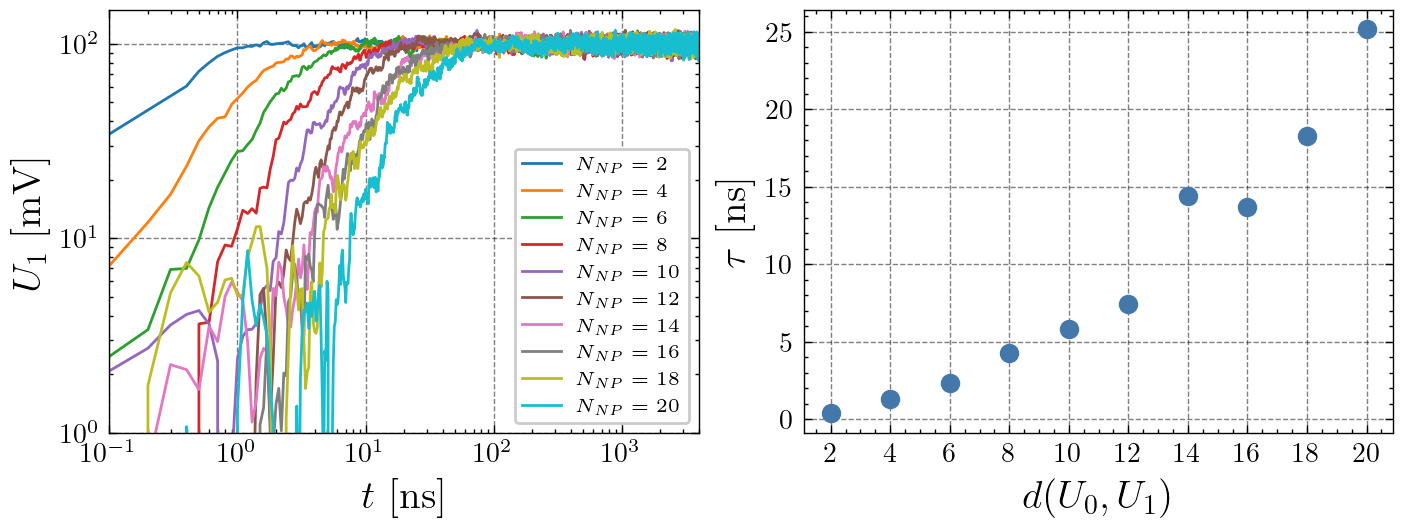

In [35]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']
cm  = plt.get_cmap('tab20')

for i, N in enumerate(N_vals):

    y_val   = data_string[N]['Current'].values*1000
    y_val_e = data_string[N]['Error'].values*1000
    pp      = ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N}$', c=cm((i)/len(N_vals)))
    # pp      = ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N}$', marker=ms[i%len(ms)], markevery=(20,100), ls='')
    # ax.plot(t_vals, stretched_saturation_curve(t_vals,*params[i]), c=pp[0].get_color())
    # ax.plot(t_vals, saturation_cuve(t_vals,*params[i]), c=pp[0].get_color())
    # ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_1$ [mV]", fontsize='x-large')
ax.set_xlabel("$t$ [ns]", fontsize='x-large')
ax.legend(frameon=True, loc='lower right', fontsize='x-small', ncol=1)
ax.set_ylim(1,150)
ax.set_xlim(0.1,4000)
ax.set_xscale('log')
ax.set_yscale('log')

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, 'o')
ax.set_ylabel("$\\tau$ [ns]", fontsize='x-large')
ax.set_xlabel("$d(U_0,U_1)$", fontsize='x-large')
ax.set_xticks(N_vals)

fig.savefig("../plots/string_time_scale_vs_system_size_room_temp.svg", transparent=True)
fig.savefig("../plots/string_time_scale_vs_system_size_room_temp.pdf", transparent=False)

In [393]:
def characteristic_time(dU=0, T=0, C=2.24, R=25):

    kB  =   1.380649e-23
    e   =   1.60217663e-19

    C   =   C * 1e-18
    R   =   R * 1e6

    a   = kB * T / (e**2 + R)
    b   = dU / (2*e*R)
    c   = 1 / (4*R*C)

    return a, b, c

Text(0.5, 0, '$\\Delta U$ [V]')

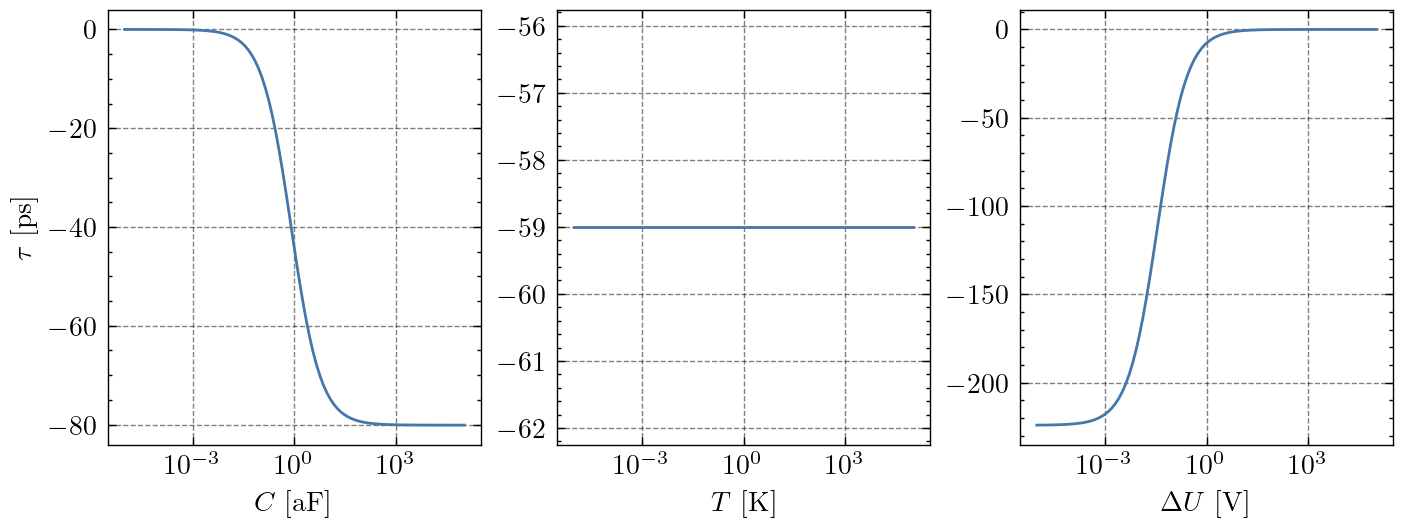

In [458]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)

C       = np.logspace(-5,5,100)
a,b,c   = characteristic_time(dU=0.1, T=0, C=C)

ax  = fig.add_subplot(1,3,1)
ax.plot(C, 1e12/(a-b-c))
ax.set_xscale('log')
ax.set_ylabel("$\\tau$ [ps]")
ax.set_xlabel("$C$ [aF]")

T       = np.logspace(-5,5,100)
a,b,c   = characteristic_time(dU=0.1, T=T)
ax  = fig.add_subplot(1,3,2)
ax.plot(T, 1e12/(a-b-c))
ax.set_xscale('log')
ax.set_xlabel("$T$ [K]")

U       = np.logspace(-5,5,100)
a,b,c   = characteristic_time(dU=U, T=0)

ax  = fig.add_subplot(1,3,3)
ax.plot(U, 1e12/(a-b-c))
ax.set_xscale('log')
ax.set_xlabel("$\Delta U$ [V]")

In [ ]:
taus    = []
tau_m   = []
params  = []
covs    = []

for i, N in enumerate(N_vals):
    x_fit   = t_vals.copy()
    y_fit   = data_string[N]['Current'].values*1000
    # p, cov  = curve_fit(stretched_saturation_curve, x_fit, y_fit, p0=[10,100,1.0], bounds=[(0,0,0),(500,120,2)])
    p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,100,1.0], bounds=[(0,80,0),(500,120,20)])
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    tau_m.append(p[0]/p[2] * gamma(1 / p[2]))
    
params

In [ ]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']
cm  = plt.get_cmap('tab20')

for i, N in enumerate(N_vals):

    y_val   = data_string[N]['Current'].values*1000
    y_val_e = data_string[N]['Error'].values*1000
    pp      = ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N}$', c=cm((i)/len(N_vals)))
    # pp      = ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N}$', marker=ms[i%len(ms)], markevery=(20,100), ls='')
    # ax.plot(t_vals, stretched_saturation_curve(t_vals,*params[i]), c=pp[0].get_color())
    # ax.plot(t_vals, saturation_cuve(t_vals,*params[i]), c=pp[0].get_color())
    # ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_7$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='lower right', fontsize='xx-small', ncol=2)
ax.set_ylim(0,110)
ax.set_xlim(0.1,4000)
ax.set_xscale('log')

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, 'o')
ax.set_ylabel("$<\\tau>$ [ns]")
ax.set_xlabel("$d(U_0,U_7)$")
ax.set_xticks(N_vals)
# ax.set_ylim(0,40)

# fig.savefig("../plots/string_time_scale_vs_system_size.svg", transparent=True)
# fig.savefig("../plots/string_time_scale_vs_system_size.pdf", transparent=False)

In [357]:
N_p                 = 4
ele_charge          = 0.160217662
kB                  = 1.38064852e-5
T_val               = 1.0
topology_parameter  = {
    "Nx"                : N_p,
    "Ny"                : 1,
    "Nz"                : 1,
    "e_pos"             : [[0,0,0],[N_p-1,0,0]],
    "electrode_type"    : ['constant','floating']
}

folder  = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/"
sim     = nanonets.simulation(topology_parameter)

inv_cap             = sim.inv_capacitance_matrix
cap_mat             = sim.capacitance_matrix
cap_mat[cap_mat!=0] = 1

df_pot      = pd.read_csv(f"{folder}mean_state_Nx={N_p}_Ny=1_Nz=1_Ne=2.csv")
mean_pot    = df_pot.mean().values
free_energy = np.zeros_like(cap_mat)

for i in range(cap_mat.shape[0]):
    for j in range(cap_mat.shape[1]):
        free_energy[i,j] = ele_charge*(mean_pot[i]-mean_pot[j]) + ele_charge*ele_charge*(inv_cap[i,i]+inv_cap[j,j]-2*inv_cap[i,j])/2
free_kbT    = free_energy / kB*T_val

In [358]:
free_energy

array([[0.        , 0.00268643, 0.00479724, 0.00455244, 0.00371256],
       [0.00209985, 0.        , 0.00393535, 0.00418537, 0.00347105],
       [0.00125181, 0.00097649, 0.        , 0.00203186, 0.00176967],
       [0.00189782, 0.00211733, 0.00292267, 0.        , 0.00139409],
       [0.00367642, 0.00402149, 0.00527897, 0.00401257, 0.        ]])

In [359]:
free_kbT

array([[  0.        , 194.5772741 , 347.46309289, 329.73172864,
        268.89949867],
       [152.09144812,   0.        , 285.03612103, 303.1450465 ,
        251.40715365],
       [ 90.66808419,  70.72693831,   0.        , 147.16691056,
        128.17699029],
       [137.45827531, 153.35741914, 211.68846592,   0.        ,
        100.97372769],
       [266.28193901, 291.27541997, 382.35443933, 290.62962137,
          0.        ]])

## String @ 10K

In [155]:
T_fold  = "highT"
folder  = f"/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/{T_fold}/"
# folder  = f"/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/{T_fold}/"
t_vals  = np.arange(4999)*1e-7*1e6
N_vals  = np.arange(2,13)

data_string_T   = {N_p : pd.read_csv(f"{folder}Nx={N_p}_Ny=1_Nz=1_Ne=2.csv") for N_p in N_vals}
states_string_T = pd.read_csv(f"{folder}mean_state_Nx=12_Ny=1_Nz=1_Ne=2.csv")

In [175]:
states_string_T

NameError: name 'states_string_T' is not defined

In [156]:
taus    = []
params  = []
covs    = []
starts  = len(N_vals)*[0]
stops   = len(N_vals)*[3000]

for i, N in enumerate(N_vals):
    x_fit   = t_vals[starts[i]:stops[i]]
    y_fit   = data_string_T[N]['Current'].values[starts[i]:stops[i]]*1000
    # p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,90], bounds=((1,70,-np.inf),(50,110,np.inf)))
    # p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,0], bounds=[(0,70,0),(60,120,10)])
    p, cov  = curve_fit(stretched_saturation_curve, x_fit, y_fit, p0=[10,80,1], bounds=[(0,70,0),(60,120,2)])
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    
params

[array([  1.61771909, 107.86981718,   0.62860398]),
 array([  3.46404955, 107.30044703,   0.70299827]),
 array([  5.93260393, 107.57468935,   0.78946275]),
 array([  9.36401274, 107.53009347,   0.80625516]),
 array([ 13.32321417, 107.35096186,   0.85162855]),
 array([ 18.63871955, 107.4130988 ,   0.86430674]),
 array([ 24.39169454, 107.31190436,   0.89965466]),
 array([ 31.40099873, 107.36005022,   0.91236126]),
 array([ 40.21901797, 107.29647789,   0.93655827]),
 array([ 49.16524826, 107.25949315,   0.94868714]),
 array([ 59.63896075, 107.18188648,   0.97038213])]

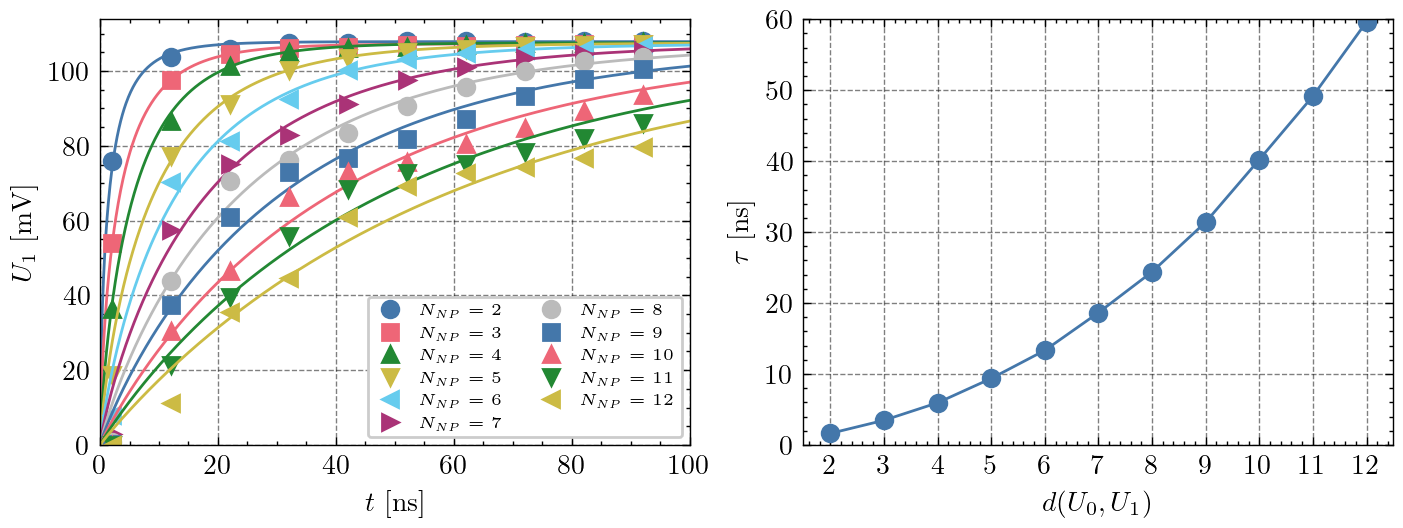

In [158]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']

for i, N in enumerate(N_vals):

    y_val   = data_string_T[N]['Current'].values*1000
    y_val_e = data_string_T[N]['Error'].values*1000
    pp      = ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N}$', marker=ms[i%len(ms)], markevery=(20,100), ls='')
    ax.plot(t_vals, stretched_saturation_curve(t_vals,*params[i]), c=pp[0].get_color())
    # ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_1$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='lower right', fontsize='xx-small', ncol=2)
ax.set_xlim(0,100)
ax.set_ylim(0)

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, '-o')
ax.set_ylabel("$\\tau$ [ns]")
ax.set_xlabel("$d(U_0,U_1)$")
ax.set_xticks(N_vals)
ax.set_ylim(0,60)

fig.savefig(f"../plots/string_at_{T_fold}_time_scale_vs_system_size.svg", transparent=True)
fig.savefig(f"../plots/string_at_{T_fold}_time_scale_vs_system_size.pdf", transparent=False)

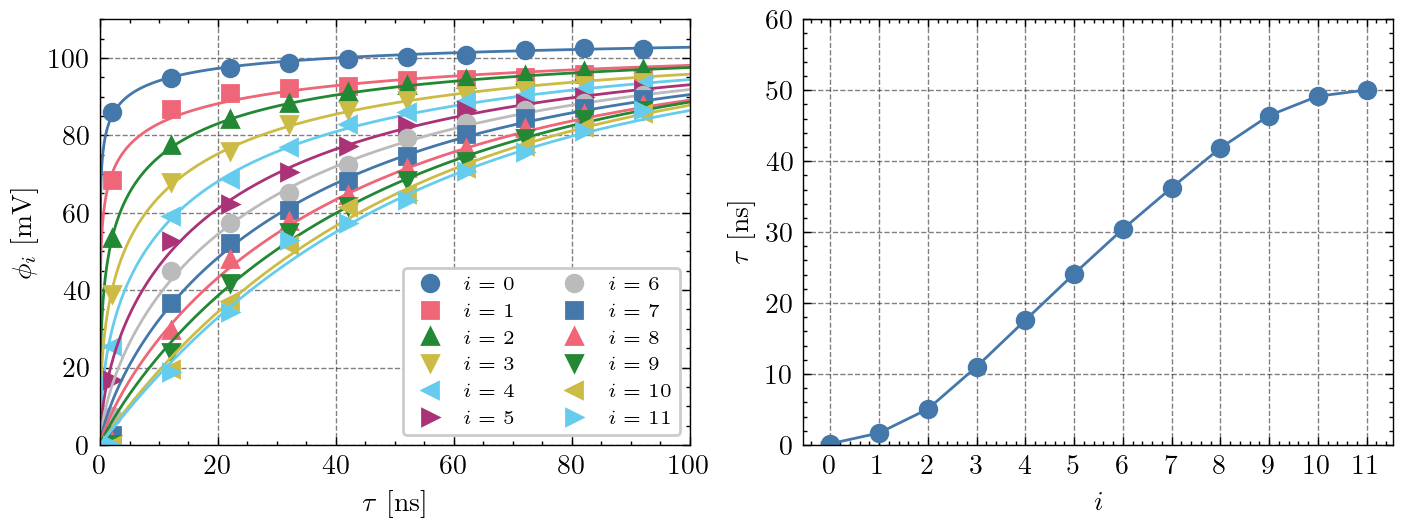

In [159]:
ms  = ['o','s','^','v','<','>']
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

tau_network = []
for i in range(12):

    y   = states_string_T[f"{i}"].values*1000
    # p,_ = curve_fit(saturation_cuve, t_vals, y, p0=[30, 90, 0], bounds=[(0,70,0),(100,120,50)])
    # p,_ = curve_fit(saturation_cuve, t_vals[:5000], y[:5000], p0=[30, 90, 0], bounds=[(0,70,0),(60,120,10)])
    p,_ = curve_fit(stretched_saturation_curve, t_vals[:5000], y[:5000], p0=[30, 90, 1], bounds=[(0,70,0),(60,120,1)])
    tau_network.append(p[0])

    pp  = ax1.plot(t_vals, y, marker=ms[i%len(ms)], label=f'$i = {i}$', markevery=(20,100), ls='')
    ax1.plot(t_vals, stretched_saturation_curve(t_vals, *p), c=pp[0].get_color())

ax1.set_xlim(0,100)
ax1.set_ylim(0,110)
ax1.set_xlabel("$\\tau$ [ns]")
ax1.set_ylabel("$\phi_i$ [mV]")
ax1.legend(ncol=2, fontsize='x-small')

ax2.plot(np.arange(12), tau_network, '-o')
ax2.set_xticks(np.arange(12))
ax2.set_ylabel("$\\tau$ [ns]")
ax2.set_xlabel("$i$")
ax2.set_ylim(0,60)

fig.savefig(f"../plots/string_states_at_{T_fold}_time_scale_vs_system_size.svg", transparent=True)
fig.savefig(f"../plots/string_states_at_{T_fold}_time_scale_vs_system_size.pdf", transparent=False)

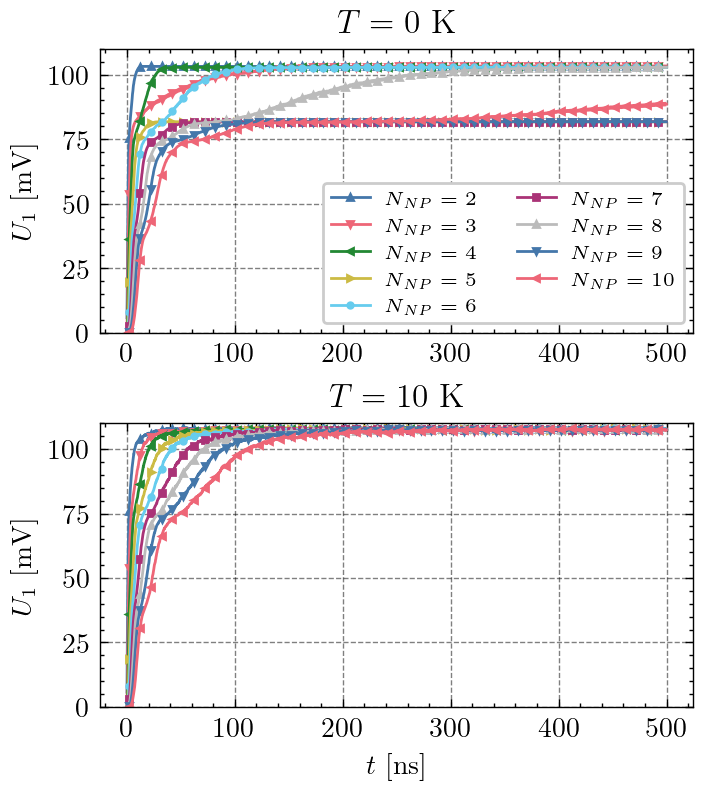

In [191]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figheight(fig.get_figheight()*1.5)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

for i in range(2,11):

    y   = data_string[i]['Current']*1000
    y_e = data_string[i]['Error']*1000

    ax1.plot(t_vals, y, label='$N_{NP} = '+f'{i}$', marker=ms[i%len(ms)], markevery=(20,100), ms=2)
    ax1.fill_between(t_vals, y-y_e, y+y_e)
    ax1.set_ylabel("$U_1$ [mV]")
    ax1.set_ylim(0,110)
    ax1.legend(ncol=2, fontsize='x-small')
    ax1.set_title('$T = 0$ K')

    y   = data_string_T[i]['Current']*1000
    y_e = data_string_T[i]['Error']*1000
    
    ax2.plot(t_vals, y, label='$N_{NP} = '+f'{N}$', marker=ms[i%len(ms)], markevery=(20,100), ms=2)
    ax2.fill_between(t_vals, y-y_e, y+y_e)
    ax2.set_ylabel("$U_1$ [mV]")
    ax2.set_xlabel("$t$ [ns]")
    ax2.set_ylim(0,110)
    ax2.set_title('$T = 10$ K')

fig.savefig(f"../plots/output_temperature_comparsion.svg", transparent=True)
fig.savefig(f"../plots/output_temperature_comparsion.pdf", transparent=False)

0.5356554612465038


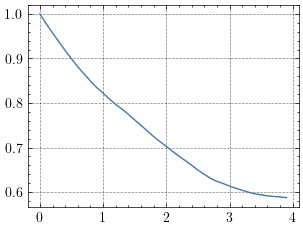

In [161]:
start   = 3000
f_end   = 40
state   = data_string_T[11]['Current'].values
y       = state[start:]*1000
ac      = nanonets_utils.autocorrelation(y, y, 1500)
t       = t_vals[:len(ac)]
p, _    = curve_fit(exp_func, t[:f_end], ac[:f_end])
plt.plot(t[:f_end], ac[:f_end])
print(np.abs(p[0]))

## Network

In [1]:
path    = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/"
N_vals  = [3,5,7,9,11,13]
data    = {N : pd.read_csv(f"{path}Nx={N}_Ny={N}_Nz=1_Ne=8.csv") for N in N_vals}
states  = pd.read_csv(f"{path}mean_state_Nx=11_Ny=11_Nz=1_Ne=8.csv")
x_val   = data[5]['E0'].values*1000
t_val   = np.arange(len(x_val))*1e-10*1e9

NameError: name 'pd' is not defined

In [195]:
taus    = []
params  = []
covs    = []
starts  = len(N_vals)*[0]
stops   = len(N_vals)*[5000]

for i, N in enumerate(N_vals):
    x_fit   = t_vals[starts[i]:stops[i]]
    y_fit   = data[N]['Current'].values[starts[i]:stops[i]]*1000
    p, cov  = curve_fit(stretched_saturation_curve, x_fit, y_fit, p0=[10,20,0], bounds=((0,0,0),(200,30,2)))
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    
params

[array([ 1.81094987, 10.22819503,  0.80748377]),
 array([3.63031915, 8.29002692, 1.15052751]),
 array([10.64988641,  9.33251991,  1.09799198]),
 array([29.63764537, 13.22357227,  1.17027035]),
 array([68.81264448, 25.9804675 ,  1.82999042]),
 array([128.50547546,  27.69472734,   1.53167537])]

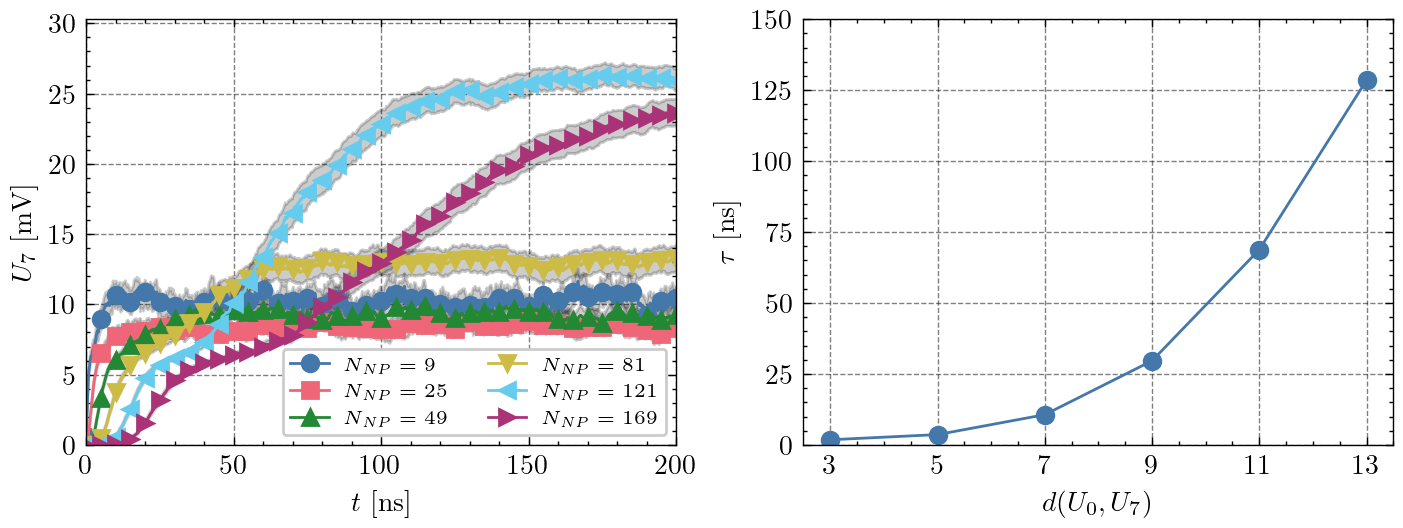

In [200]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']

for i, N in enumerate(N_vals):

    y_val   = data[N]['Current'].values*1000
    y_val_e = data[N]['Error'].values*1000
    ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N**2}$', marker=ms[i%len(ms)], markevery=(50))
    ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_7$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='lower right', fontsize='x-small', ncol=2)
ax.set_xlim(0,200)
ax.set_ylim(0)

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, '-o')
ax.set_ylabel("$\\tau$ [ns]")
ax.set_xlabel("$d(U_0,U_7)$")
ax.set_xticks(N_vals)
ax.set_ylim(0,150)

fig.savefig("../plots/network_time_scale_vs_system_size.svg", transparent=True)
fig.savefig("../plots/network_time_scale_vs_system_size.pdf", transparent=False)

In [214]:
[i*11+11//2 for i in range(11)] + [121]

[5, 16, 27, 38, 49, 60, 71, 82, 93, 104, 115, 121]

In [213]:
11*11

121

In [218]:
states_string

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.045312,0.015904,0.004412,0.001203,0.000328,0.000089,0.000024,0.000007,0.000002,4.936670e-07,1.347624e-07,3.742445e-08,1.272531e-08
1,0.057602,0.026976,0.008983,0.002496,0.000680,0.000185,0.000051,0.000014,0.000004,1.024357e-06,2.796315e-07,7.765559e-08,2.640497e-08
2,0.065364,0.034964,0.014120,0.004286,0.001168,0.000318,0.000087,0.000024,0.000006,1.758922e-06,4.801547e-07,1.333423e-07,4.533993e-08
3,0.070252,0.040504,0.019233,0.006894,0.001949,0.000531,0.000145,0.000039,0.000011,2.934340e-06,8.010234e-07,2.224497e-07,7.563884e-08
4,0.072698,0.045456,0.023894,0.009730,0.002951,0.000805,0.000219,0.000060,0.000016,4.443235e-06,1.212925e-06,3.368377e-07,1.145338e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.102055,0.087345,0.098696,0.086763,0.097898,0.086491,0.093324,0.086367,0.083075,9.727145e-02,8.570426e-02,9.701321e-02,8.177111e-02
4995,0.102055,0.087345,0.098696,0.086763,0.097898,0.086491,0.093324,0.086367,0.083075,9.727145e-02,8.570426e-02,9.701321e-02,8.177111e-02
4996,0.102055,0.087343,0.098688,0.086732,0.097928,0.086499,0.093326,0.086367,0.083076,9.727150e-02,8.570427e-02,9.701322e-02,8.177111e-02
4997,0.102055,0.087343,0.098688,0.086732,0.097928,0.086499,0.093326,0.086367,0.083076,9.727150e-02,8.570427e-02,9.701322e-02,8.177111e-02


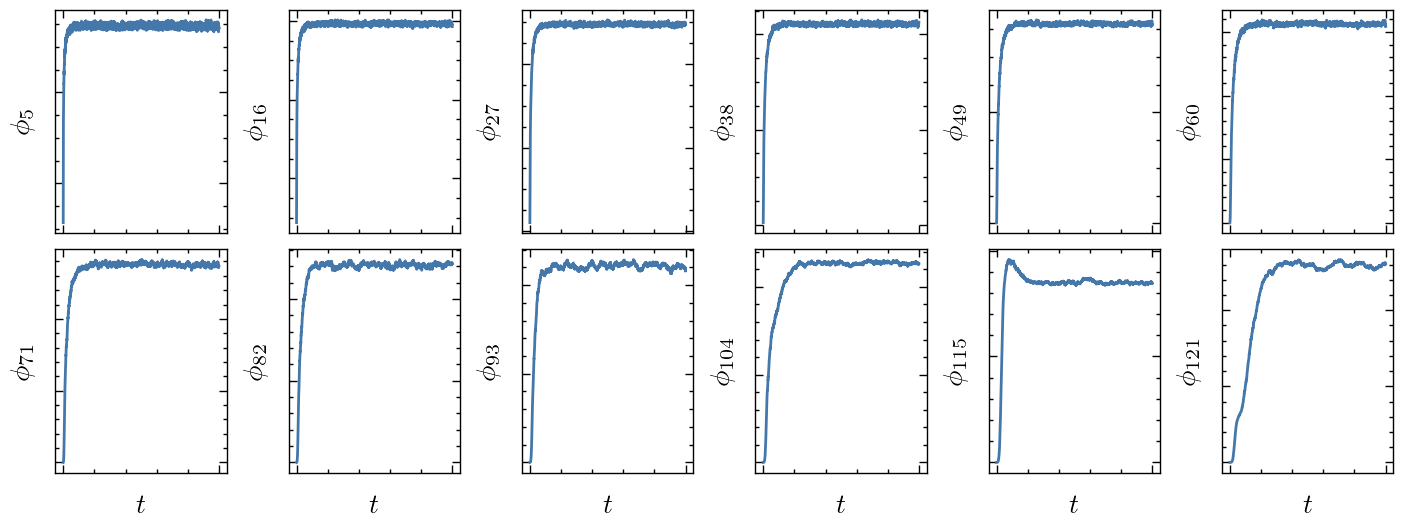

In [235]:
i_np    = [i*11+11//2 for i in range(11)] + [121]
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)

for j, i in enumerate(i_np):

    ax  = fig.add_subplot(2,6,j+1)
    y   = states[f"{i}"].values*1000

    ax.plot(t_vals, y)
    ax.set_ylabel("$\phi_{"f'{i}'+"}$")
    ax.set_yticklabels("")
    ax.set_xticklabels("")
    ax.grid(False)

    if j > 5:
        ax.set_xlabel("$t$")
    
fig.savefig("../plots/network_states.svg", transparent=True)
fig.savefig("../plots/network_states.pdf", transparent=False)

---